## Decision Tree and Random Forest with Python


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaseEnsemble,GradientBoostingClassifier
import time

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
df.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
              "BMI","DiabetesPedigreeFunction","Age","Outcome"]

In [4]:
df.shape

(767, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
df['Outcome'].value_counts()

0    500
1    267
Name: Outcome, dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
X = pd.DataFrame(df,columns=df.columns[:-1])
y = df['Outcome']

#### Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state= 0, test_size=0.20)

## Decision Tree Classifier

In [11]:
DT = DecisionTreeClassifier()

In [12]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred_DT = DT.predict(X_test)

In [16]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [17]:
DT.get_n_leaves()

106

In [18]:
DT.get_depth()

13

In [19]:
# training accuracy
DT.score(X_train,y_train)

1.0

### Decision Tree Model Evaluation

In [26]:
cm = confusion_matrix(y_test,y_pred_DT)

In [27]:
print(cm)

[[81 20]
 [20 33]]


#### Diff methods to find accuracy score. Accuracy = TP+TN / TP+TN+FP+FN  using confusion matrix. accuracy_score(), classification_report()

In [28]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7402597402597403


In [29]:
accuracy_score(y_test,y_pred_DT)

0.7402597402597403

In [30]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       101
           1       0.62      0.62      0.62        53

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



#### Training accuracy = 100% , Test accuracy = 73%. The model is clearly overfitting the training data looking from the accuracy scores. So, lets tune the hyperparameters to get optimal training and test score.

In [31]:
DT.feature_importances_
pd.DataFrame(index=X.columns,data=DT.feature_importances_,
             columns=['Feature Importance'])

,Feature Importance
Pregnancies,0.064374
Glucose,0.299892
BloodPressure,0.079237
SkinThickness,0.049168
Insulin,0.075804
BMI,0.208045
DiabetesPedigreeFunction,0.102305
Age,0.121175


### Tuning Decision Tree model with GridSearchCV.

In [32]:
dt_params = {"max_depth" : list(range(1,10)), "min_samples_leaf":[1,2,3,4,5,6,7], 
             "criterion" : ["gini","entropy"]}

In [33]:
DT_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = dt_params, cv = 8)

In [34]:
DT_grid_model = DT_grid.fit(X_train,y_train)

In [35]:
DT_grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4}

#### Decision Tree model with the tuned hyperparameters from grid search

In [36]:
DT_tuned = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, 
                                  min_samples_leaf = 4)

In [37]:
DT_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4)

#### Training score before tuning the model is 0.91. The training score after tuning as below

In [38]:
DT_tuned.score(X_train,y_train)

0.7716150081566069

In [39]:
y_pred_tunedDT = DT.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred_tunedDT)

array([[81, 20],
       [20, 33]])

In [41]:
print(classification_report(y_test, y_pred_tunedDT))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       101
           1       0.62      0.62      0.62        53

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



#### The training and test accuracy  is around 83% after tuning the hyperparameters of Decision Tree model using GridSearchCV, as opposed to 100% and 83% earlier .

## Random Forest

In [42]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
y_pred_RF = RF.predict(X_test)

from sklearn import metrics

print(" Test Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred_RF)))

 Test Accuracy = 0.792


In [45]:
feature_importances =pd.DataFrame({"Features":X_train.columns,
              "Feature Imporances": RF.feature_importances_}).sort_values(by="Feature Imporances")


In [46]:
feature_importances.head()

,Features,Feature Imporances
4,Insulin,0.071756
3,SkinThickness,0.075238
0,Pregnancies,0.085756
2,BloodPressure,0.086771
7,Age,0.123627


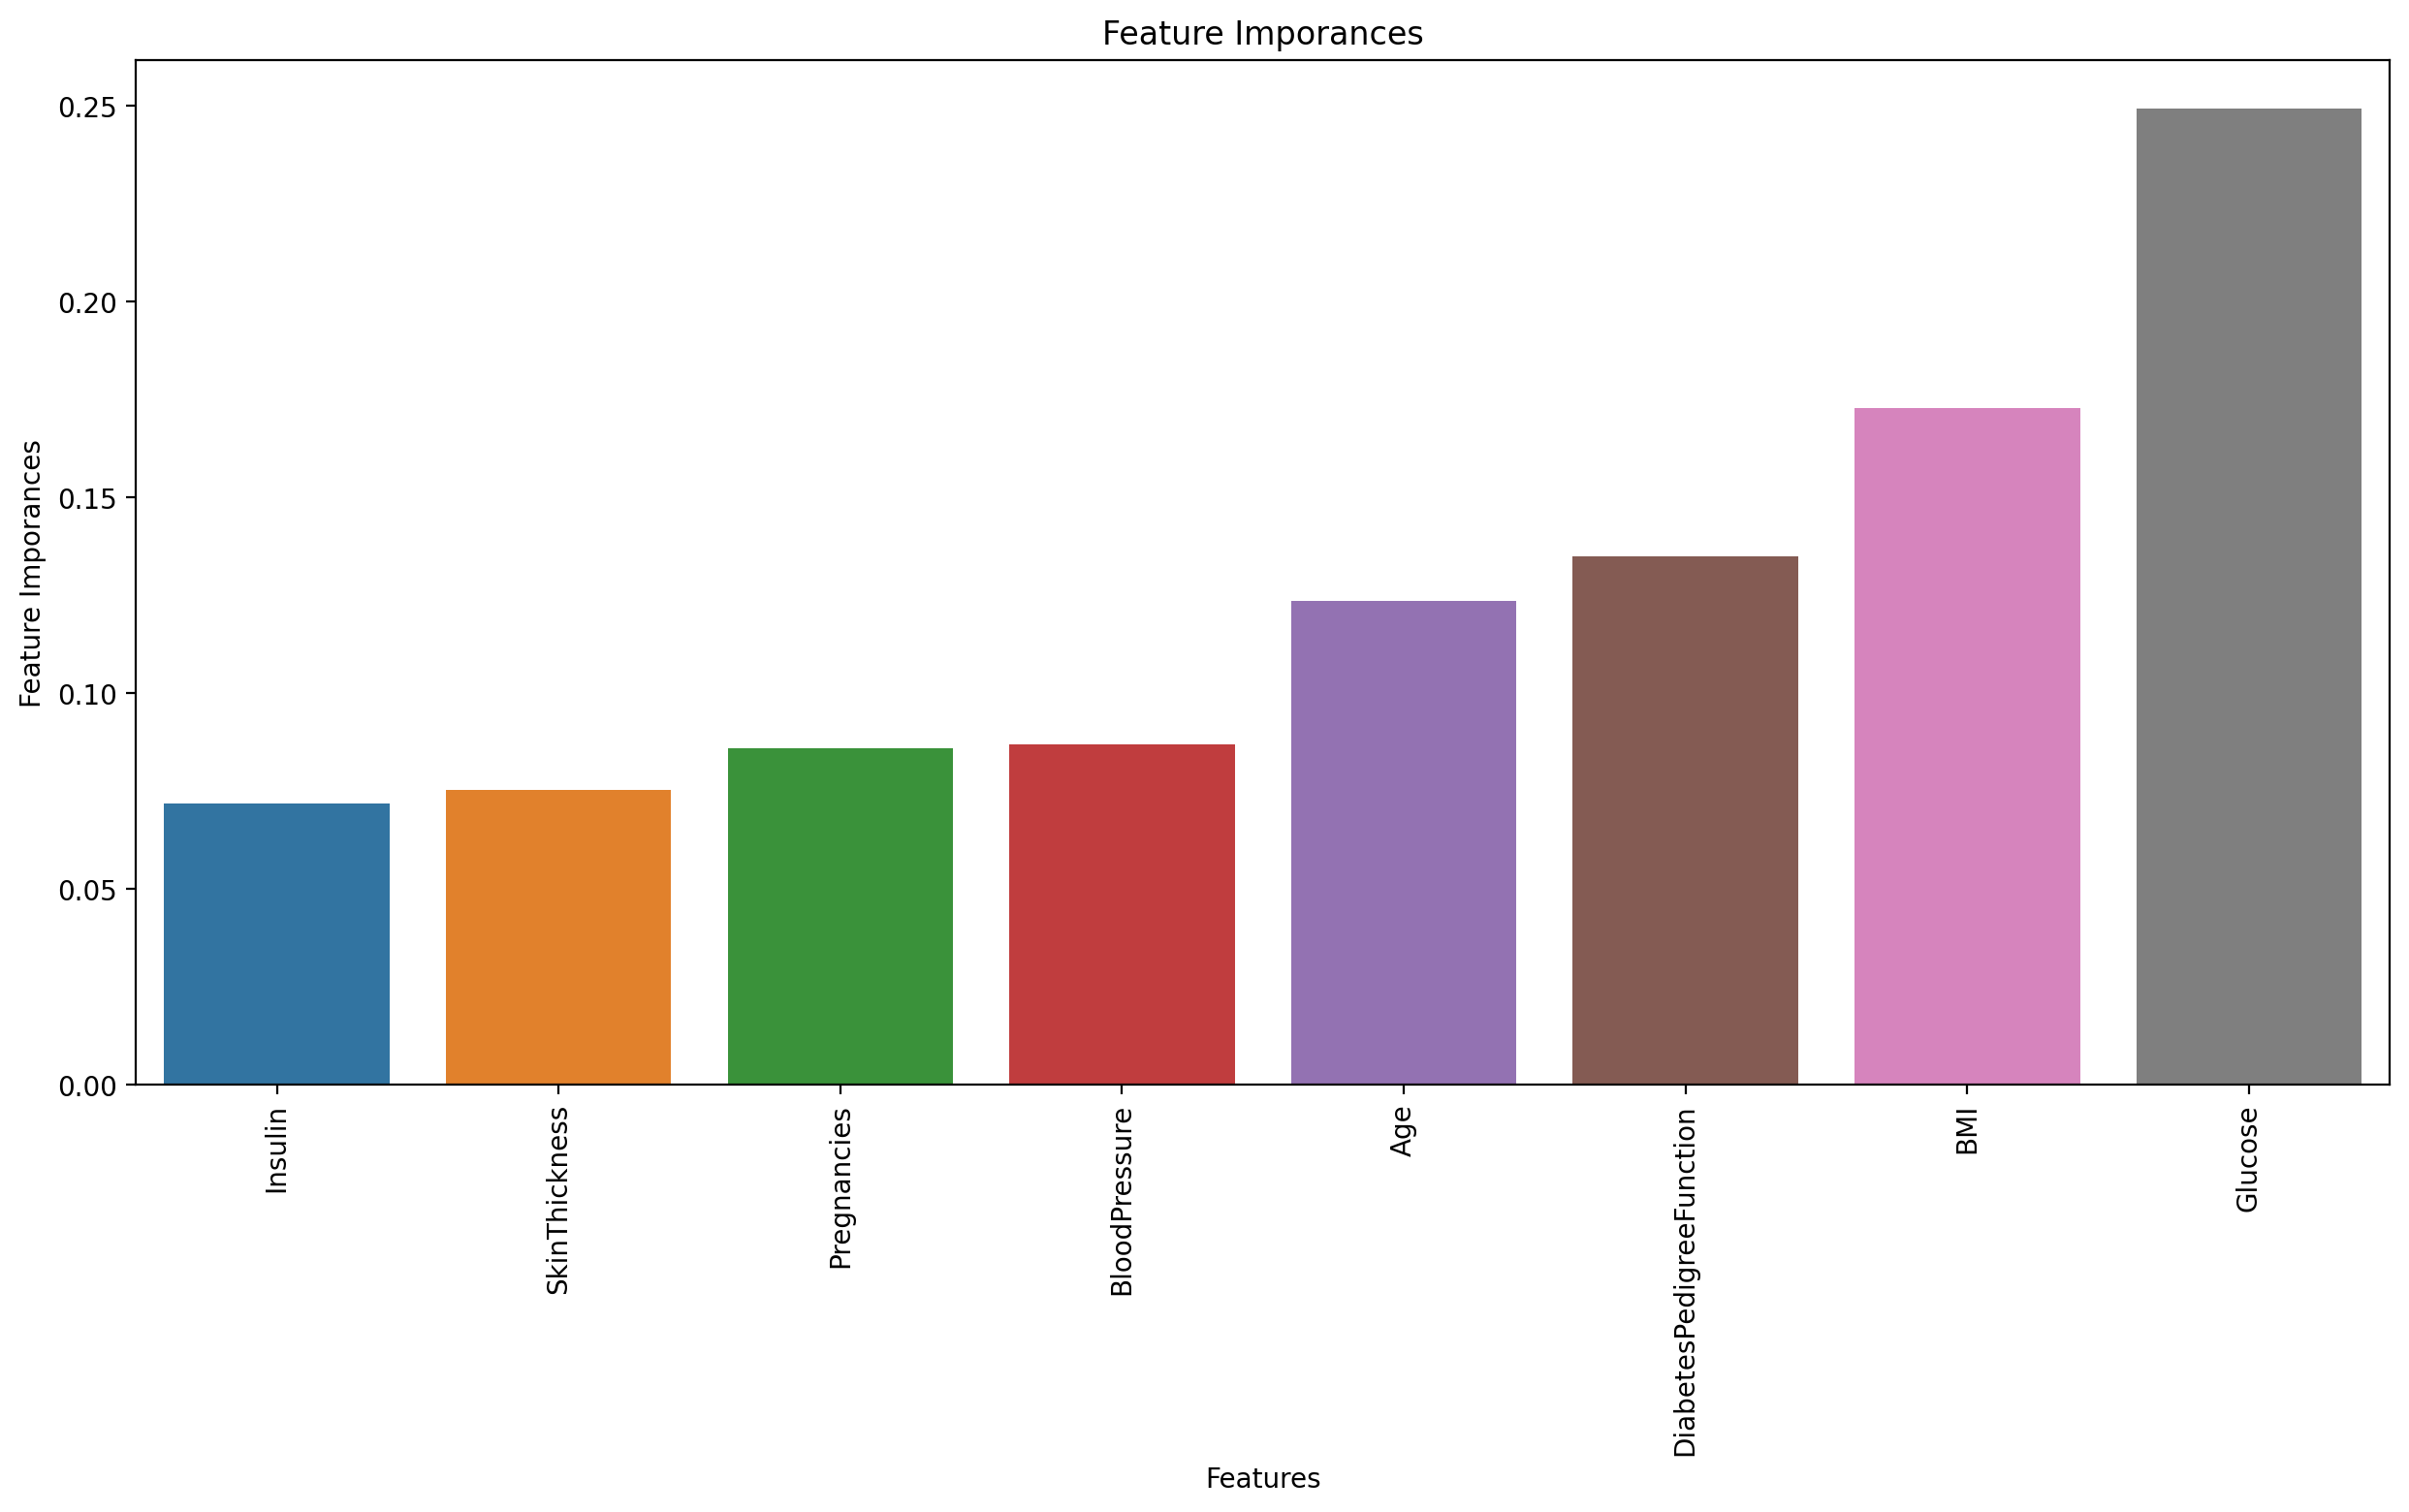

In [47]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(data=feature_importances,x="Features",y="Feature Imporances")
plt.title("Feature Imporances")
plt.xticks(rotation=90)
plt.show()

In [48]:
cm = confusion_matrix(y_test,y_pred_RF)

In [49]:
cm

array([[90, 11],
       [21, 32]])

In [50]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       101
           1       0.74      0.60      0.67        53

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



##### Fine tuning the RF model using k-fold cross validation

In [51]:
accuracies= cross_val_score(estimator=RF,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 75.38 %
Standart Deviation of Accuracies: 3.83 %


In [52]:
RF.predict(X_test)[:10]

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

#### Tuning the RF model with GridSearchCV.  Parameters : max_depth, max_features, n_estimators and criterion 



In [1]:
# Number of estimators(trees)
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#              'criterion':['entropy','gini']}
#print(random_grid)

In [84]:
random_forests_params = {"max_depth": list(range(1,10)),
                         "max_features":[2,5,7,8],
                         "n_estimators":[20,30,40,60,80,100],
                         "criterion":["gini","entropy"]}

In [85]:
random_forest_cv = RandomizedSearchCV(RF,random_forests_params,
                                cv=9)

In [86]:
#start_time = time.time()

random_forest_cv.fit(X_train,y_train)

#elapsed_time = time.time() - start_time

#print(f"Elapsed time for Random Forests Classifier cross validation: "
#      f"{elapsed_time:.3f} seconds")

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [2, 5, 7, 8],
                                        'n_estimators': [20, 30, 40, 60, 80,
                                                         100]})

In [87]:
#best score
random_forest_cv.best_score_

0.7781093113573933

In [88]:
#best parameters
random_forest_cv.best_params_

{'n_estimators': 60, 'max_features': 7, 'max_depth': 7, 'criterion': 'entropy'}

In [90]:
RF_tuned = RandomForestClassifier(criterion="gini",max_depth=7,max_features=7,
                                             n_estimators=100).fit(X_train,y_train)

In [91]:
y_pred = RF_tuned.predict(X_test)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       101
           1       0.76      0.64      0.69        53

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [93]:
Importances = pd.DataFrame({"Importance":RF_tuned.feature_importances_*100},
                           index=X_train.columns)

In [94]:
Importances.head()

,Importance
Pregnancies,5.965798
Glucose,36.779254
BloodPressure,6.242227
SkinThickness,3.941977
Insulin,5.358924


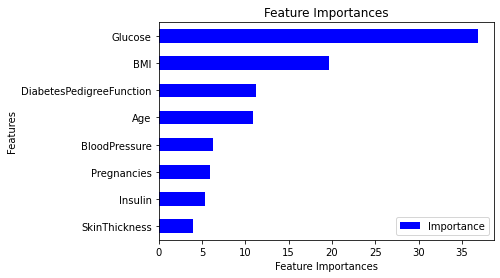

In [95]:
Importances.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="b")
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title("Feature Importances");